# Project 3

In this project, you will perform a logistic regression on the admissions data we've been working with in projects 1 and 2.

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np


In [43]:
df_raw = pd.read_csv("../assets/admissions.csv")
df = df_raw.dropna() 
print df.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Part 1. Frequency Tables

#### 1. Let's create a frequency table of our variables

Axes(0.125,0.125;0.775x0.775)
Axes(0.125,0.125;0.775x0.775)
Axes(0.125,0.125;0.775x0.775)


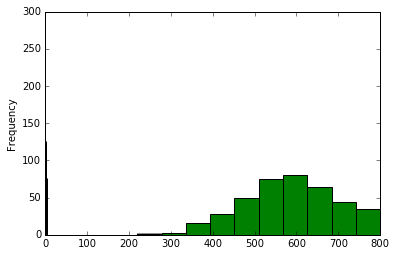

In [44]:
admit = df['admit']
gre = df['gre']
gpa = df['gpa']
print admit.plot(kind = 'hist')
print gre.plot(kind = 'hist')
print gpa.plot(kind = 'hist')


## Part 2. Return of dummy variables

#### 2.1 Create class or dummy variables for prestige 

In [45]:
dummy_ranks = pd.get_dummies(df['prestige'], prefix = 'prestige')

#### 2.2 When modeling our class variables, how many do we need? 



Answer: I think we will ultimately end up with 6 explanatory variables: GPA score, GRE score, Prestige 1, Prestige 2, Prestige 3 Prestige 4. 

## Part 3. Hand calculating odds ratios

Develop your intuition about expected outcomes by hand calculating odds ratios.

In [46]:
cols_to_keep = ['admit', 'gre', 'gpa']
handCalc = df[cols_to_keep].join(dummy_ranks)
print handCalc.head()



   admit    gre   gpa  prestige_1.0  prestige_2.0  prestige_3.0  prestige_4.0
0      0  380.0  3.61           0.0           0.0           1.0           0.0
1      1  660.0  3.67           0.0           0.0           1.0           0.0
2      1  800.0  4.00           1.0           0.0           0.0           0.0
3      1  640.0  3.19           0.0           0.0           0.0           1.0
4      0  520.0  2.93           0.0           0.0           0.0           1.0


In [47]:
#crosstab prestige 1 admission 
# frequency table cutting prestige and whether or not someone was admitted

print pd.crosstab(handCalc['admit'], handCalc['prestige_1.0'])



prestige_1.0  0.0  1.0
admit                 
0             243   28
1              93   33


#### 3.1 Use the cross tab above to calculate the odds of being admitted to grad school if you attended a #1 ranked college

In [48]:
#Calculating odds by hand (p/1-p)
p1 = 33.0/(33+28)
o1 = p1/(1-p1)
print o1


#Odds are ~1.18
#Also could be expressed roughly as 8:7

1.17857142857


#### 3.2 Now calculate the odds of admission if you did not attend a #1 ranked college

In [49]:
p0 = 93.0/(93+243)
o0 = p0 / (1-p0)
print o0

#Odds of not being admitted are 0.38
#Could be roughly further reduced to 4:10


0.382716049383


#### 3.3 Calculate the odds ratio

In [50]:
p0 = 93.0/(93+243)
o0 = p0/(1-p0)
print o0

p1 = 33.0/(33+28)
o1 = p1/(1-p1)
print o1

odds_ratio = o1/o0
print odds_ratio

0.382716049383
1.17857142857
3.07949308756


#### 3.4 Write this finding in a sentenance: 

Our data revelas that students studying at a prestige 1 undergraduate unviersity were 3 times more likely to be admitted to graduate programs than those that did not. 

#### 3.5 Print the cross tab for prestige_4

In [51]:
pd.crosstab(handCalc['admit'], handCalc['prestige_4.0'])

prestige_4.0,0.0,1.0
admit,,
0,216,55
1,114,12


#### 3.6 Calculate the OR 

In [52]:
pp41 = 12.0/(55+12)
op41 = pp41/(1-pp41)

pp40 = 114.0/(216+114)
op40 = pp40/(1-pp40)

op40/op41





2.418981481481482

#### 3.7 Write this finding in a sentence

Answer: Undergraduate students from a prestige 4 program are almost 2.5 times less liekly than other students to be admitted to graduate school.

## Part 4. Analysis

In [70]:
# create a clean data frame for the regression
cols_to_keep = ['admit', 'gre', 'gpa']
data = df[cols_to_keep].join(dummy_ranks.ix[:, 'prestige_2':])
print data.head()
data.dropna(inplace=True)

   admit    gre   gpa  prestige_2.0  prestige_3.0  prestige_4.0
0      0  380.0  3.61           0.0           1.0           0.0
1      1  660.0  3.67           0.0           1.0           0.0
2      1  800.0  4.00           0.0           0.0           0.0
3      1  640.0  3.19           0.0           0.0           1.0
4      0  520.0  2.93           0.0           0.0           1.0


We're going to add a constant term for our Logistic Regression. The statsmodels function we're going to be using requires that intercepts/constants are specified explicitly.

In [54]:
# manually add the intercept
data['intercept'] = 1.0
print data.head()



   admit    gre   gpa  prestige_2.0  prestige_3.0  prestige_4.0  intercept
0      0  380.0  3.61           0.0           1.0           0.0        1.0
1      1  660.0  3.67           0.0           1.0           0.0        1.0
2      1  800.0  4.00           0.0           0.0           0.0        1.0
3      1  640.0  3.19           0.0           0.0           1.0        1.0
4      0  520.0  2.93           0.0           0.0           1.0        1.0


#### 4.1 Set the covariates to a variable called train_cols

In [55]:
train_cols = data.columns[1:]
y = data['admit']

#### 4.2 Fit the model

In [56]:
logit = sm.Logit(data['admit'], data[train_cols])
result = logit.fit()


Optimization terminated successfully.
         Current function value: 0.573854
         Iterations 6


#### 4.3 Print the summary results

In [57]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  admit   No. Observations:                  397
Model:                          Logit   Df Residuals:                      391
Method:                           MLE   Df Model:                            5
Date:                Wed, 18 Jan 2017   Pseudo R-squ.:                 0.08166
Time:                        16:41:44   Log-Likelihood:                -227.82
converged:                       True   LL-Null:                       -248.08
                                        LLR p-value:                 1.176e-07
================================================================================
                   coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
gre              0.0022      0.001      2.028      0.043      7.44e-05     0.004
gpa              0.7793      0.333      2.344      0.019         0.128     1.431
prestige_2.0    -0.6801      0.317     -2.146      0.032        -1.301    -0.059
prestige_3.0    -1.3387      0.345     -3.882      0.000        -2.015    -0.663
prestige_4.0    -1.5534      0.417     -3.721      0.000        -2.372    -0.735
intercept       -3.8769      1.142     -3.393      0.001        -6.116    -1.638
================================================================================
"""

In [69]:
params = result.params
Conf = result.conf_int()
Conf['OR'] = np.exp(params)
Conf.columns = ['2.5%', '97.5%', 'OR' ]

print Conf

                  2.5%     97.5%        OR
gre           0.000074  0.004362  1.002221
gpa           0.127619  1.431056  2.180027
prestige_2.0 -1.301337 -0.058936  0.506548
prestige_3.0 -2.014579 -0.662776  0.262192
prestige_4.0 -2.371624 -0.735197  0.211525
intercept    -6.116077 -1.637631  0.020716


#### 4.5 Interpret the OR of Prestige_2

The odds ratio of Prestige_2 is -0.68. If the odds ratio was one we could assume that a prestige_2 of "1" would have no impact on the likelyhood of a student being admitted. Because the odds ratio is > 1 we can assume that a prestige of 2 (which assumes that the prestige is not 1) will result in a student being less likely to be admitted to graduate school -- which in this data set we are returning .506, so we would assume that students with prestige_2 are about half as likely to be admitted. 

#### 4.6 Interpret the OR of GPA

Because GPA is not a classification variable I would assume that we would interpret this more similarly to a coeffeceint. In this case our Odds Ratio for GPA is 2.180, which I translate to for every 1.0 increase in GPA students become ~twice as likely to be admitted. 

## Part 5: Predicted probablities


As a way of evaluating our classifier, we're going to recreate the dataset with every logical combination of input values. This will allow us to see how the predicted probability of admission increases/decreases across different variables. First we're going to generate the combinations using a helper function called cartesian (above).

We're going to use np.linspace to create a range of values for "gre" and "gpa". This creates a range of linearly spaced values from a specified min and maximum value--in our case just the min/max observed values.

In [68]:
def cartesian(arrays, out=None):
    """
    Generate a cartesian product of input arrays.
    Parameters
    ----------
    arrays : list of array-like
        1-D arrays to form the cartesian product of.
    out : ndarray
        Array to place the cartesian product in.
    Returns
    -------
    out : ndarray
        2-D array of shape (M, len(arrays)) containing cartesian products
        formed of input arrays.
    Examples
    --------
    >>> cartesian(([1, 2, 3], [4, 5], [6, 7]))
    array([[1, 4, 6],
           [1, 4, 7],
           [1, 5, 6],
           [1, 5, 7],
           [2, 4, 6],
           [2, 4, 7],
           [2, 5, 6],
           [2, 5, 7],
           [3, 4, 6],
           [3, 4, 7],
           [3, 5, 6],
           [3, 5, 7]])
    """

    arrays = [np.asarray(x) for x in arrays]
    dtype = arrays[0].dtype

    n = np.prod([x.size for x in arrays])
    if out is None:
        out = np.zeros([n, len(arrays)], dtype=dtype)

    m = n / arrays[0].size
    out[:,0] = np.repeat(arrays[0], m)
    if arrays[1:]:
        cartesian(arrays[1:], out=out[0:m,1:])
        for j in xrange(1, arrays[0].size):
            out[j*m:(j+1)*m,1:] = out[0:m,1:]
    return out

In [73]:
# instead of generating all possible values of GRE and GPA, we're going
# to use an evenly spaced range of 10 values from the min to the max 
gres = np.linspace(data['gre'].min(), data['gre'].max(), 10)
print gres
# array([ 220.        ,  284.44444444,  348.88888889,  413.33333333,
#         477.77777778,  542.22222222,  606.66666667,  671.11111111,
#         735.55555556,  800.        ])
gpas = np.linspace(data['gpa'].min(), data['gpa'].max(), 10)
print gpas
# array([ 2.26      ,  2.45333333,  2.64666667,  2.84      ,  3.03333333,
#         3.22666667,  3.42      ,  3.61333333,  3.80666667,  4.        ])


# enumerate all possibilities
combos = pd.DataFrame(cartesian([gres, gpas, [1, 2, 3, 4], [1.]]))

[ 220.          284.44444444  348.88888889  413.33333333  477.77777778
  542.22222222  606.66666667  671.11111111  735.55555556  800.        ]
[ 2.26        2.45333333  2.64666667  2.84        3.03333333  3.22666667
  3.42        3.61333333  3.80666667  4.        ]


#### 5.1 Recreate the dummy variables

In [74]:
#rename combos to sensical column titles
combos.columns = ['gre', 'gpa','prestige','intercept']
#get dummies from prestige
dummy_prestige = pd.get_dummies(combos['prestige'],prefix='prestige')
#rename dummy column titles
dummy_prestige.columns = ['prestige_1.0','prestige_2.0','prestige_3.0','prestige_4.0']
#create clean final dataframe
cols_to_keep = ['gre','gpa','prestige','intercept']
combos = combos[cols_to_keep].join(dummy_prestige)


#### 5.2 Make predictions on the enumerated dataset

       gre       gpa  prestige  intercept  prestige_1.0  prestige_2.0  \
395  800.0  3.806667       4.0        1.0           0.0           0.0   
396  800.0  4.000000       1.0        1.0           1.0           0.0   
397  800.0  4.000000       2.0        1.0           0.0           1.0   
398  800.0  4.000000       3.0        1.0           0.0           0.0   
399  800.0  4.000000       4.0        1.0           0.0           0.0   

     prestige_3.0  prestige_4.0  admit_pred  
395           0.0           1.0    0.334286  
396           0.0           0.0    0.734040  
397           0.0           0.0    0.582995  
398           1.0           0.0    0.419833  
399           0.0           1.0    0.368608  


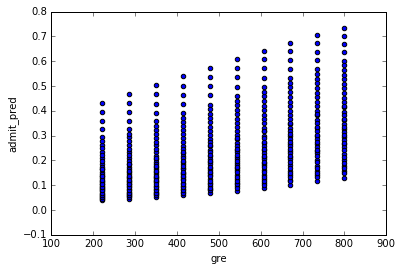

In [93]:
combos['admit_pred'] = result.predict(combos[train_cols])
print combos.tail()

combos.plot(kind = 'scatter', x='gre', y='admit_pred')



#### 5.3 Interpret findings for the last 4 observations

The "admit_pred" gives us the log odds of a student being admitted. To translate this into probability we can use the assumption that p(admit_pred)= (exponent(admit_pred))/(exponent(admit_pred)+1)

Probabilities of students to be admitted for the last 5 observations shown below



In [76]:
def p_from_logit(x):
    probability = (x**2)/((x**2)+1)
    print probability
    
p_from_logit(x=0.334286)
p_from_logit(x=0.734040)
p_from_logit(x=0.582995)
p_from_logit(x=0.419833)
p_from_logit(x=0.368608)

0.100514880409
0.350149185628
0.253666273022
0.149847640545
0.119619001692


## Bonus

Plot the probability of being admitted into graduate school, stratified by GPA and GRE score.

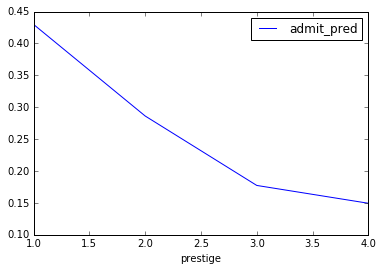

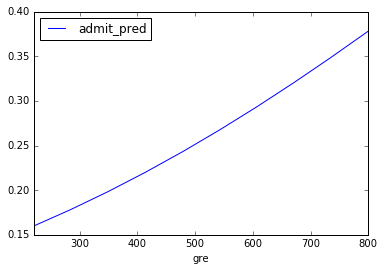

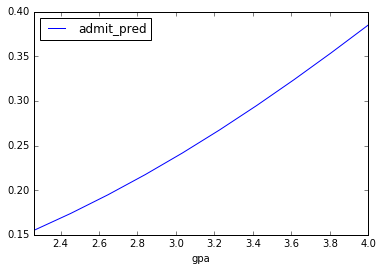

In [92]:

pd.pivot_table(combos, values=['admit_pred'], index=['prestige'],aggfunc=np.mean).plot()
pd.pivot_table(combos, values=['admit_pred'], index=['gre'],aggfunc=np.mean).plot()
pd.pivot_table(combos, values=['admit_pred'], index=['gpa'],aggfunc=np.mean).plot()

    


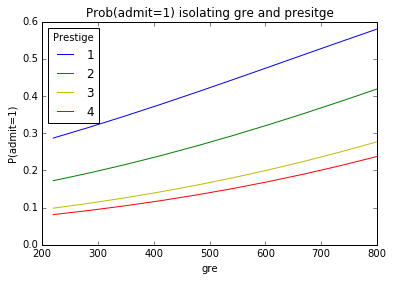

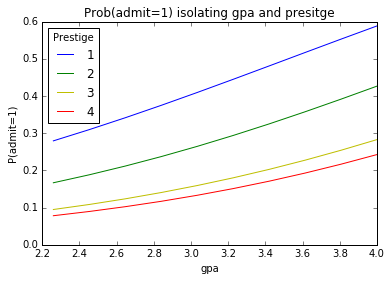

In [94]:
  def isolate_and_plot(variable):
      # isolate gre and class rank
      grouped = pd.pivot_table(combos, values=['admit_pred'], index=[variable, 'prestige'],
                  aggfunc=np.mean)
      # make a plot
      colors = 'rbgyrbgy'
      for col in combos.prestige.unique():
          plt_data = grouped.ix[grouped.index.get_level_values(1)==col]
          pl.plot(plt_data.index.get_level_values(0), plt_data['admit_pred'], color=colors[int(col)])

      pl.xlabel(variable)
      pl.ylabel("P(admit=1)")
      pl.legend(['1', '2', '3', '4'], loc='upper left', title='Prestige')
      pl.title("Prob(admit=1) isolating " + variable + " and presitge")
      pl.show()

  isolate_and_plot('gre')
  isolate_and_plot('gpa')